<a href="https://colab.research.google.com/github/Abdul-Malik2/Project-store-game/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%98%D0%BD%D1%82%D0%B5%D0%B3%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8_%D0%BD%D0%B0_%D0%94%D0%95%D0%9C%D0%9E_%D0%9F%D0%90%D0%9D%D0%95%D0%9B%D0%AC_%7C_%D0%94%D0%97_Lite_%7C_%D0%A3%D0%98%D0%98%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Необходимо создать, обучить нейронную сеть и упаковать её в архив для загрузки на демо-панель:
* создать нейронную сеть для распознавания цифр из MNIST
* сохраните веса (модель)
* подготовить запуск модели "из коробки"
* подготовить архив с готовой нейронной сетью для загрузки в демо-панель


###загрузка занных

In [ ]:
# загрузка датасета MNIST

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Подключение класса для работы с изображением
from PIL import Image, ImageOps, ImageEnhance

# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten, SpatialDropout2D

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam

# Библиотека для работы с массивами
import numpy as np

import random

#библиотека пандас
import pandas as pd

# метод из библиотеки keras
from keras.preprocessing import image

# Отрисовка графиков
import matplotlib.pyplot as plt

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from sklearn.datasets import load_wine

#######################################

# Для управление директориями и путями файловой системы
import os

# Библиотека компьютерного зрения, для обработки изображений и видео
import cv2


# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

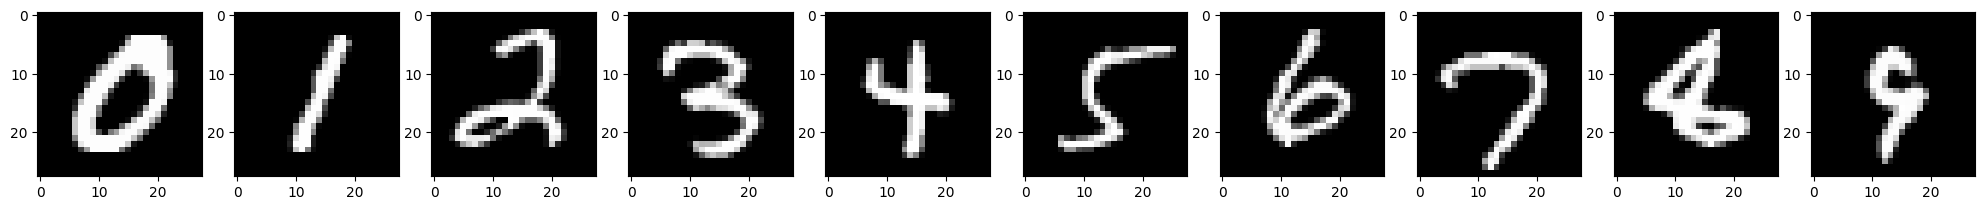

In [ ]:
# вывод изображений каждого класса для ознакомления с датасетом

fig, axs = plt.subplots(1, 10, figsize=(25,3)) # создаем полотно для 10 графиков с размером 25 на 3
for i in range(10):
  label_indexes = np.where(y_train == i)[0] # получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # выбирает случайный индекс из списка созданного выше
  img = x_train[index] # выбираем из x_train нужное положение
  axs[i].imshow(Image.fromarray(img), cmap='gray') # выводим изображение


plt.show()

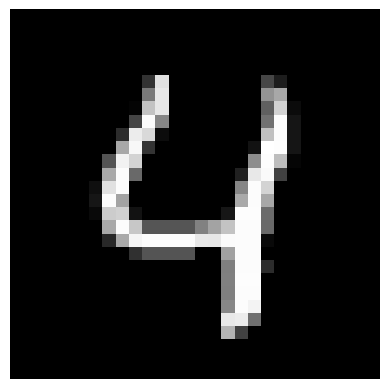

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из файла с указанием полного пути
data = pd.read_csv('/content/sample_data/mnist_test.csv')

# Преобразование данных в массив NumPy
pixels = data.iloc[3, 1:].values
pixels = np.array(pixels, dtype='uint8')

# Изменение формы массива в 2D-матрицу размером 28x28
image = pixels.reshape((28, 28))

# Отображение изображения
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
# Добавляю ось, чтобы было явно видно сколько каналов цвета
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

# добавляем размерность массиву mnist, чтобы сеть поняла что это чб, и нормирую данные
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1) / 255
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1) / 255

# преобразуем выборки с ответами в OHE
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# посмотрим форматы выборок перед обучением
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
x_test: (10000, 28, 28)

y_train: (60000,)
y_test: (10000,)
x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)

y_train: (60000, 10)
y_test: (10000, 10)


In [ ]:
from operator import index
import pandas as pd
result = pd.DataFrame()

##обучение модели

In [ ]:
# Г И П Е Р П А Р А М Е Т Р Ы:

# количество нейронов входящего слоя
incomingLayer = 32

# количество фильтров входящего слоя
incomingFiltr = 32

# количество фильтров (ядер)
numberFilters = 64

# количество свёрточных слоёв
convolutionalLayers = 3

# размер фильтра
sizeFilters = 3,3

# размер окна пулинга
poolSize= 3,3

IMG_WIDTH           = 28 # Ширина изображения для нейросети
IMG_HEIGHT          = 28  # Высота изображения для нейросети
IMG_CHANNELS        = 1   # Количество каналов (для RGB равно 3, для Grey равно 1)

# количество нейронов выходного слоя
CLASS_COUNT = 10

# количество скрытых слоёв
allHiddenLayers = 1

# количество нейронов скрытых слоёв
hiddenLayers = 256

# размер batch_size
batchSize = 128

# количество эпох
numbersEpochs = 15

# функция ошибки
lossFunction = 'categorical_crossentropy' # 'categorical_crossentropy' 'sparse_categorical_crossentropy' 'mean_squared_error'

# rmsprop = optimizers.RMSprop(learning_rate=0.001, rho=0.9)


# оптимизатор
myOptimizer = Adam #'Adam' 'rmsprop'

# шаг оптимизатора
LEARNING_RATE = 1e-3 # 0.0001



# М О Д Е Л Ь:

model = Sequential()
#model.add(Dropout(0.5, input_shape=(x_train.shape[1],)))
#model.add(Dense(units=incomingLayer, input_shape=(x_train.shape[1],)))

model.add(Conv2D(incomingFiltr, (3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)))


for laeer in range(convolutionalLayers):

    model.add(Conv2D(numberFilters, (sizeFilters), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(poolSize)))
    model.add(SpatialDropout2D(0.25))

model.add(Flatten()) # уплощаем все слои в одну линию

for laeer in range(allHiddenLayers):

    model.add(Dense(hiddenLayers, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

model.add(Dense(CLASS_COUNT, activation='softmax'))

#model.compile(loss='categorical_crossentropy', optimizer=Adam (learning_rate=0.001), metrics=['accuracy'])#(learning_rate=0.001)
model.compile(loss=lossFunction, optimizer=myOptimizer (LEARNING_RATE), metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 64)          0         
 D)                                                              
                                                                 
 spatial_dropout2d (Spatial  (None, 9, 9, 64)          0         
 Dropout2D)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 64)          0

Epoch 1/15
375/375 [==============================] - 19s 13ms/step - loss: 0.6547 - accuracy: 0.7843 - val_loss: 0.1226 - val_accuracy: 0.9830
Epoch 2/15
375/375 [==============================] - 5s 13ms/step - loss: 0.1353 - accuracy: 0.9607 - val_loss: 0.0432 - val_accuracy: 0.9868
Epoch 3/15
375/375 [==============================] - 5s 12ms/step - loss: 0.0956 - accuracy: 0.9735 - val_loss: 0.0353 - val_accuracy: 0.9896
Epoch 4/15
375/375 [==============================] - 5s 12ms/step - loss: 0.0779 - accuracy: 0.9776 - val_loss: 0.0311 - val_accuracy: 0.9916
Epoch 5/15
375/375 [==============================] - 5s 12ms/step - loss: 0.0647 - accuracy: 0.9805 - val_loss: 0.0309 - val_accuracy: 0.9912
Epoch 6/15
375/375 [==============================] - 4s 12ms/step - loss: 0.0598 - accuracy: 0.9827 - val_loss: 0.0292 - val_accuracy: 0.9919
Epoch 7/15
375/375 [==============================] - 5s 13ms/step - loss: 0.0541 - accuracy: 0.9843 - val_loss: 0.0297 - val_accuracy: 0.992

<ipython-input-9-a976a21f7486>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append(iter, ignore_index=True)


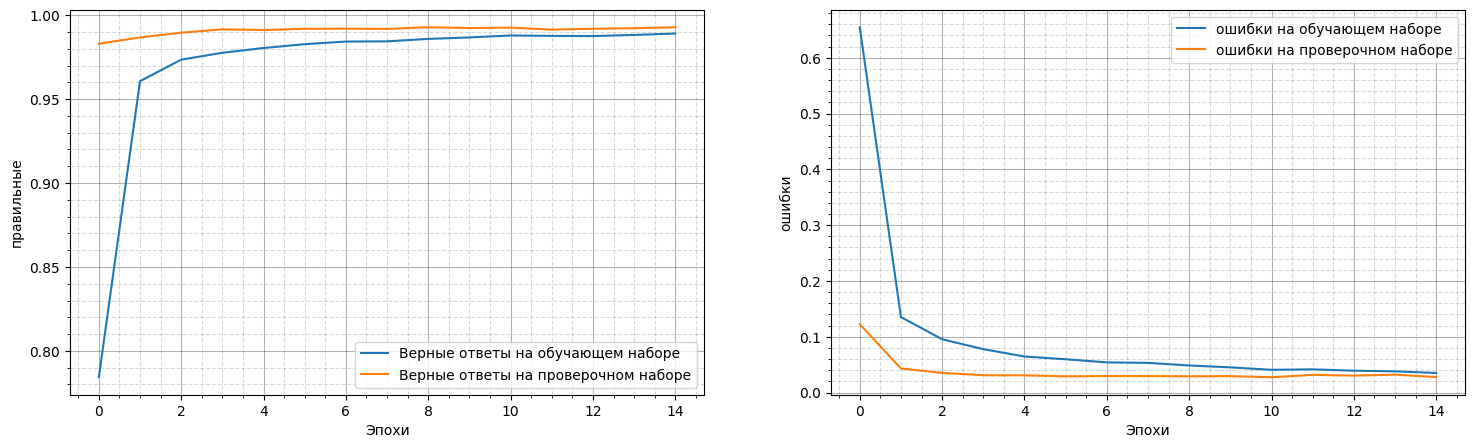

In [ ]:
# запуск модели:

history = model.fit(x_train, y_train, batch_size=batchSize, epochs=numbersEpochs, validation_split=0.2, verbose=1) # validation_data=(x_val, y_val)

iter={'слой регуляции':'Dropout(0.5) BatchNormalization', 'функция ошибок':lossFunction,'оптимизатор':myOptimizer,'в первом слое':incomingLayer,'в скрытых слоях':hiddenLayers, 'кол-во скрытых слоёв':allHiddenLayers, 'функция активации':'softmax', 'количество эпох':numbersEpochs, 'batch_size':batchSize, 'accuracy':max(history.history['accuracy']), 'val_accuracy':max(history.history['val_accuracy']),'loss':min(history.history['loss']), 'va[_loss':min(history.history['val_loss'])}
result=result.append(iter, ignore_index=True)
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)


# Т А Б Л И Ц Ы:

plt.figure(figsize=(18,5))

# таблица правильных ответов
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Верные ответы на обучающем наборе')
plt.plot(history.history['val_accuracy'],label='Верные ответы на проверочном наборе')
plt.xlabel('Эпохи')
plt.ylabel('правильные')
plt.legend()
plt.grid(which = 'major', color = 'black', alpha = 0.3) # включаю и настраиваю отображение основной сетки
plt.minorticks_on() # включаю отображение дополнительной сетки
plt.grid(which = 'minor', color = 'gray', linestyle = '--' , alpha = 0.3) # настраиваю отображение дополнительной сетки
#plt.show()

# таблица ошибок
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='ошибки на обучающем наборе')
plt.plot(history.history['val_loss'],label='ошибки на проверочном наборе')
plt.xlabel('Эпохи')
plt.ylabel('ошибки')
plt.legend()
plt.grid(which = 'major', color = 'black', alpha = 0.3) # включаю и настраиваю отображение основной сетки
plt.minorticks_on() # включаю отображение дополнительной сетки
plt.grid(which = 'minor', color = 'gray', linestyle = '--' , alpha = 0.3) # настраиваю отображение дополнительной сетки
#plt.show()

In [ ]:
result

,слой регуляции,функция ошибок,оптимизатор,в первом слое,в скрытых слоях,кол-во скрытых слоёв,функция активации,количество эпох,batch_size,accuracy,val_accuracy,loss,va[_loss
0,Dropout(0.5) BatchNormalization,categorical_crossentropy,<class 'keras.src.optimizers.adam.Adam'>,32,256,1,softmax,15,128,0.989083,0.992833,0.03515,0.027547


In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Процент верных ответов: ', round(scores[1], 2) * 100, '%')

313/313 [==============================] - 1s 4ms/step - loss: 0.0210 - accuracy: 0.9931
Процент верных ответов:  99.0 %


In [ ]:
# сохраняю модель
model.save('model_with_numbers.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# сохраняю веса
model.save_weights('weights_with_numbers.h5')

## сохранение модели

скачиваю архив с изображениями 10-ти рукописных цифр

In [1]:
import gdown

gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l6/0-9.zip', None, quiet=True)

'0-9.zip'

распаковываю архив

In [2]:
# Распакуем архив
!unzip -q 0-9.zip

In [3]:
rm 0-9.zip


In [9]:
model = load_model('/content/model_with_numbers.h5')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 64)          0         
 D)                                                              
                                                                 
 spatial_dropout2d (Spatial  (None, 9, 9, 64)          0         
 Dropout2D)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 64)          0

In [92]:
#в скрипте должны быть импортированы все необходимые библиотеки для запуска модели, открытия и подготовки изображения.
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

# она должна иметь имя predict, так как сервер демо-панели будет вызывать функцию именно с таким именем;
def predict(

    # должна иметь первый обязательный аргумент img_path - путь к тестовому изображению на сервере демо-панели;
    img_path='/content/0-9/0.jpg',

    #она должна иметь второй обязательный аргумент model_path - путь к модели на сервере демо-панели;
    model_path='/content/model_with_numbers.h5'):

    classes = {0: '0',
               1: '1',
               2: '2',
               3: '3',
               4: '4',
               5: '5',
               6: '6',
               7: '7',
               8: '8',
               9: '9'}

    model = load_model(model_path)

    img_width, img_height = 28, 28

    img = Image.open(img_path).resize((img_height, img_width))
    image = np.array(img.convert('L'))
    image = 255 - np.array(image)
    image[image<50] = 0

    image = np.expand_dims(image, axis=0)
    image = np.expand_dims(image, axis=-1)

    cls_image = np.argmax(model.predict(image))

    print(classes[cls_image])

In [93]:
predict(img_path='/content/0-9/5.jpg', model_path='/content/model_with_numbers.h5')

1/1 [==============================] - 0s 120ms/step
5


In [94]:
# помещаю свой код в переменну:
my_text_code = '''
#в скрипте должны быть импортированы все необходимые библиотеки для запуска модели, открытия и подготовки изображения.
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

# она должна иметь имя predict, так как сервер демо-панели будет вызывать функцию именно с таким именем;
def predict(

    # должна иметь первый обязательный аргумент img_path - путь к тестовому изображению на сервере демо-панели;
    img_path='/content/0-9/1.jpg',

    #она должна иметь второй обязательный аргумент model_path - путь к модели на сервере демо-панели;
    model_path='/content/model_with_numbers.h5'):
    classes = {0: '0',
               1: '1',
               2: '2',
               3: '3',
               4: '4',
               5: '5',
               6: '6',
               7: '7',
               8: '8',
               9: '9'}

    model = load_model(model_path)

    img_width, img_height = 28, 28

    img = Image.open(img_path).resize((img_height, img_width))
    image = np.array(img.convert('L'), dtype='float64') / 255

    image = np.expand_dims(image, axis=0)
    image = np.expand_dims(image, axis=-1)

    cls_image = np.argmax(model.predict(image))

    print(classes[cls_image])
'''

In [95]:
with open('my_code.py', 'w') as f:
  f.write(my_text_code.strip())

подберем десять различных изображений, соответствующих классам датасета. Эти десять изображений будут отображаться на странице демо-панели в качестве пресетов. Загрузим их в директорию Colab под порядковыми номерами классов

In [96]:
from shutil import copyfile         # Библиотека для работы с файлами

for i in range(1,10):
    copyfile('/content/0-9/'+str(i)+'.jpg', '/content/'+str(i)+'.jpg')

In [97]:
my_tags = '''
0
1
2
3
4
5
6
7
8
9

'''

In [98]:
with open('my_tags.txt', 'w') as f:
  f.write(my_tags.strip())       # Запись в файл переменной text

упаковываю классы метки и картинки в zip

In [99]:
import os
from zipfile import ZipFile as Zip             # Модуль для работы с zip-архивами

# Список всех файлов
numbers_for_archive = ['model_with_numbers.h5', 'my_code.py', 'my_tags.txt', *[f'{i}.jpg' for i in range(1,10)]]

zipArchive = Zip('/content/my1Archive.zip', 'w')  # Открытие файла, если такого не существует - будет создан новый

for file in numbers_for_archive:               # Для всех всем нужных файлов:
    if os.path.exists(file):                   # Если файл существует,
        zipArchive.write(file)                 # то добавление его в архив
    else:
        print(f'Файл {file} отсутствует!')     # иначе вывод на экран названия отсутствующего файла

zipArchive.close()                             # В финале архив следует закрыть, как и обычный файл

скачиваю zip на компьютер, чтобы потом загрузить его в приложение

In [100]:
from google.colab import files               # Функция для скачивания данных на локальный компьютер

files.download(filename='my1Archive.zip')       # Скачивание готового архива

print('Архив загружен')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Архив загружен
